# Plot Combined plot of decadal trend of SST (coastal boxes) and regional EKE MKE

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
import pandas as pd
import cmocean.cm as cm
import cmocean
import xscale

%matplotlib inline

In [5]:
# load altimetry data
fname = '/home/z3526974/Work/data/EAC_altimetry/IMOS_aggregation_whole_system_SSH/IMOS_aggregation_20200316T003045Z.nc'
ds = xr.open_dataset(fname)
# interpolate to daily
ALT = ds.resample(TIME='1D').interpolate('linear')
# cut out common time period with SST
ALT = ds.sel(TIME=slice('1993-01-01','2017-03-18'))

In [6]:
# load SST data
fname = '~/Work/data/CMC_SST/CMC_temp_EAC_wholesystem_large.nc'
SST = xr.open_dataset(fname)
SST = SST.analysed_sst - 273.15
# cut out common time period with SST
SST = SST.sel(time=slice('1993-01-01','2017-03-18'))

## Compute EKE and MKE as per Backeberg et al 2012

In [7]:
# MKE and EKE are calculated relative to the annual mean
UCUR_annual = ds.UCUR.groupby('TIME.year').mean('TIME')
VCUR_annual = ds.VCUR.groupby('TIME.year').mean('TIME')
U_prime = ds.UCUR.groupby('TIME.year') - UCUR_annual
V_prime = ds.VCUR.groupby('TIME.year') - VCUR_annual
ALT['KE'] = 0.5*(ds.UCUR**2 + ds.VCUR**2)
ALT['EKE'] = 0.5*(U_prime**2 + U_prime**2)
ALT['MKE'] = 0.5*(UCUR_annual**2 + VCUR_annual**2)

/home/z3526974/anaconda2/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Calculate trends and significance level for both EKE and MKE

In [8]:
EKE_annual_means = ALT.EKE.groupby('TIME.year').mean('TIME')

year = EKE_annual_means.year
lat = EKE_annual_means.LATITUDE
lon = EKE_annual_means.LONGITUDE

print(np.shape(EKE_annual_means))
EKE_EAC_slope = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='EKE_EAC_slope')

EKE_EAC_p_value = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='EKE_EAC_p_value')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        EKE_EAC_slope[iid, jid], _, _, EKE_EAC_p_value[iid, jid], _ = \
        stats.linregress(year, EKE_annual_means[:, iid, jid])

(25, 86, 66)


/home/z3526974/anaconda2/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [9]:
MKE_annual_means = ALT.MKE

year = MKE_annual_means.year
lat = MKE_annual_means.LATITUDE
lon = MKE_annual_means.LONGITUDE

print(np.shape(MKE_annual_means))
MKE_EAC_slope = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='MKE_EAC_slope')

MKE_EAC_p_value = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='MKE_EAC_p_value')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        MKE_EAC_slope[iid, jid], _, _, MKE_EAC_p_value[iid, jid], _ = \
        stats.linregress(year, MKE_annual_means[:, iid, jid])

(28, 86, 66)


## Calculate annual SST trends

In [10]:
SST_annual_means = SST.groupby('time.year').mean('time')

year = SST_annual_means.year
lat = SST_annual_means.lat
lon = SST_annual_means.lon

print(np.shape(SST_annual_means))
SST_EAC_slope = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='SST_EAC_slope')

SST_EAC_p_value = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='SST_EAC_p_value')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        SST_EAC_slope[iid, jid], _, _, SST_EAC_p_value[iid, jid], _ = \
        stats.linregress(year, SST_annual_means[:, iid, jid])
    #print('lat ' + str(np.array(i)))
#print(SST_EAC_slope)

(25, 86, 86)


## Separate out time series of EKE north and south of 32S
write function to remove seasonal cycle and filter

In [ ]:
def process_alt(tseries)
'''remove seasonal cycle, calculate trend, and filter'''
    # remove seasonal cycle the old-school way
    climatology = EKE_S.groupby('TIME.month').mean('TIME') - EKE_S.mean()
    anomalies = EKE_S.groupby('TIME.month') - climatology
    EKE_S_anomalies = anomalies
    #filter with hanning window
    wt = EKE_S_anomalies.window
    filt=730 # setting it here for all 3 cases
    wt.set(n=filt, dim='TIME', window='hanning')
    EKE_S_filt_anomalies = wt.convolve()
    #use earl's method for plotting trendline:
    EKE_S_annual_means = EKE_S_anomalies.groupby('TIME.year').mean('TIME')
    EKE_S_slope, EKE_S_intercept, EKE_S_rvalue, EKE_S_pvalue, EKE_S_stderr = stats.linregress(EKE_S_annual_means.year, EKE_S_annual_means)
    x_EKE_S = [EKE_S_annual_means.year.isel(year=0), EKE_S_annual_means.year.isel(year=-1)]
    # slope * x + intercept
    y_EKE_S = [EKE_S_slope*x_EKE_S[0] + EKE_S_intercept, EKE_S_slope*x_EKE_S[1] + EKE_S_intercept]
    
    return 

0.13895396052304387
0.7794792851295398


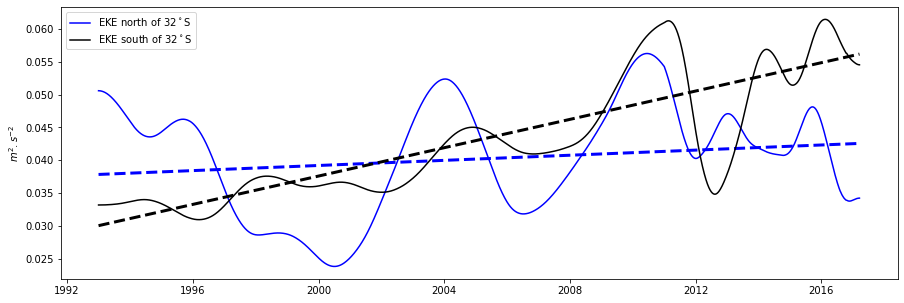

In [11]:
# Separate out latitudinally
EKE_S = ALT.EKE.sel(LATITUDE=slice(-40, -32)).mean(dim = {'LATITUDE', 'LONGITUDE'})
EKE_N = ALT.EKE.sel(LATITUDE=slice(-32, -26)).mean(dim = {'LATITUDE', 'LONGITUDE'})

## South
# remove seasonal cycle the old-school way
climatology = EKE_S.groupby('TIME.month').mean('TIME') - EKE_S.mean()
anomalies = EKE_S.groupby('TIME.month') - climatology
EKE_S_anomalies = anomalies
#filter with hanning window
wt = EKE_S_anomalies.window
filt=730 # setting it here for all 3 cases
wt.set(n=filt, dim='TIME', window='hanning')
EKE_S_filt_anomalies = wt.convolve()

## North
climatology = EKE_N.groupby('TIME.month').mean('TIME') - EKE_N.mean()
anomalies = EKE_N.groupby('TIME.month') - climatology
EKE_N_anomalies = anomalies
#filter with hanning window
wt = EKE_N_anomalies.window
filt=730 # setting it here for all 3 cases
wt.set(n=filt, dim='TIME', window='hanning')
EKE_N_filt_anomalies = wt.convolve()

#use earl's method for plotting trendline:
## South
EKE_S_annual_means = EKE_S_anomalies.groupby('TIME.year').mean('TIME')
EKE_S_slope, EKE_S_intercept, EKE_S_rvalue, EKE_S_pvalue, EKE_S_stderr = stats.linregress(EKE_S_annual_means.year, EKE_S_annual_means)
x_EKE_S = [EKE_S_annual_means.year.isel(year=0), EKE_S_annual_means.year.isel(year=-1)]
# slope * x + intercept
y_EKE_S = [EKE_S_slope*x_EKE_S[0] + EKE_S_intercept, EKE_S_slope*x_EKE_S[1] + EKE_S_intercept]

## North
EKE_N_annual_means = EKE_N_anomalies.groupby('TIME.year').mean('TIME')
EKE_N_slope, EKE_N_intercept, EKE_N_rvalue, EKE_N_pvalue, EKE_N_stderr = stats.linregress(EKE_N_annual_means.year, EKE_N_annual_means)
x_EKE_N = [EKE_N_annual_means.year.isel(year=0), EKE_N_annual_means.year.isel(year=-1)]
# slope * x + intercept
y_EKE_N = [EKE_N_slope*x_EKE_N[0] + EKE_N_intercept, EKE_N_slope*x_EKE_N[1] + EKE_N_intercept]

fig = plt.figure(1, figsize=(15,5))
n = plt.plot(EKE_N.TIME ,EKE_N_filt_anomalies, label='EKE north of 32$^\circ$S',color='blue')
plt.plot([EKE_N.TIME[0].values,EKE_N.TIME[-1].values],y_EKE_N,color='blue',linestyle='--',linewidth=3)
s = plt.plot(EKE_S.TIME ,EKE_S_filt_anomalies, label='EKE south of 32$^\circ$S',color='black')
plt.plot([EKE_S.TIME[0].values,EKE_S.TIME[-1].values],y_EKE_S,color='black',linestyle='--',linewidth=3)
plt.ylabel('$m^{2}.s^{-2}$')
plt.legend()

print(EKE_N_rvalue)
print(EKE_S_rvalue)

## Plot EKE, MKE, SST and a time series of EKE in a single plot

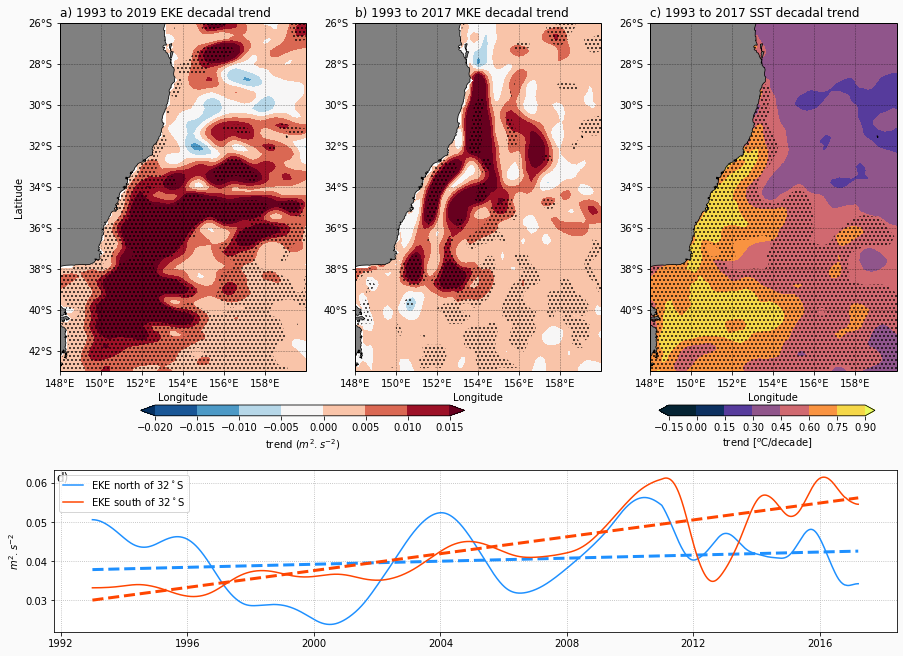

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

roi = [148, 160, -43, -26]

land_50m= cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor='gray',
                                    linewidth=0.75)

fig = plt.figure(1, figsize=(15,15), facecolor=[0.98,0.98,0.98]) 

# Plot EKE
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.set_extent(roi)

levels=np.arange(-0.02,0.02,0.005)
cmap = plt.cm.RdBu_r
data = EKE_EAC_slope * 10
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())

levels2=[0, 0.05]
data2 = EKE_EAC_p_value
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())

ax1.set_title('a) 1993 to 2019 EKE decadal trend', loc='left')

ax1.set_xticks(np.arange(148, 160, 2), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-26, -43, -2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')


ax1.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax1.add_feature(land_50m)

#Plot MKE
ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(roi)

levels=np.arange(-0.02,0.02,0.005)
cmap = plt.cm.RdBu_r
data = MKE_EAC_slope * 10
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())

levels2=[0, 0.05]
data2 = MKE_EAC_p_value
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())

ax2.set_title('b) 1993 to 2017 MKE decadal trend', loc='left')

ax2.set_xticks(np.arange(148, 160, 2), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(-26, -42, -2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.set_xlabel('Longitude')
#ax2.set_ylabel('Latitude')


ax2.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax2.add_feature(land_50m)

cbar_ax = fig.add_axes([.2, 0.3, .3, .01]) #left, bottom, width, height
fig.colorbar(plot, cax=cbar_ax, orientation="horizontal",extend='both')
plt.xlabel('trend ($m^{2}.s^{-2}$)')

#plot SST
ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax3.set_extent(roi)

cmap = cmocean.cm.thermal
data = SST_EAC_slope * 10
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, extend='both', vmin=0,vmax=0.9, transform=ccrs.PlateCarree())
levels3=[0, 0.01]
data3 = SST_EAC_p_value
plot3 = plt.contourf(data3.lon, data3.lat, data3, hatches=['...'],colors='none', levels=levels3, transform=ccrs.PlateCarree())

ax3.set_title('b) 1993 to 2017 SST decadal trend', loc='left')

ax3.set_xticks(np.arange(148, 160, 2), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(-26, -42, -2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.set_xlabel('Longitude')
ax3.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax3.add_feature(land_50m)
cbar_ax3 = fig.add_axes([.68, 0.3, .2, .01]) #left, bottom, width, height
fig.colorbar(plot, cax=cbar_ax3, orientation="horizontal",extend='both')
plt.xlabel('trend [$^o$C/decade]')

ax3.set_title('c) 1993 to 2017 SST decadal trend', loc='left')

### EKE timeseries
tseries = fig.add_axes([.12, 0.1, .78, .15]) #left, bottom, width, height
n = plt.plot(EKE_N.TIME ,EKE_N_filt_anomalies, label='EKE north of 32$^\circ$S',color='dodgerblue')
plt.plot([EKE_N.TIME[0].values,EKE_N.TIME[-1].values],y_EKE_N,color='dodgerblue',linestyle='--',linewidth=3)
s = plt.plot(EKE_S.TIME ,EKE_S_filt_anomalies, label='EKE south of 32$^\circ$S',color='orangered')
plt.plot([EKE_S.TIME[0].values,EKE_S.TIME[-1].values],y_EKE_S,color='orangered',linestyle='--',linewidth=3)
plt.ylabel('$m^{2}.s^{-2}$')
plt.legend()
plt.grid(linestyle=':')
plt.text(0.01, 0.95, 'd)', horizontalalignment='center',verticalalignment='center', transform=tseries.transAxes,fontsize=12)

#plt.savefig('EKE_MKE_SST_trendmap.png', dpi=300,bbox_inches='tight')

## Now let's make boxes that are a bit more granular

In [16]:
EKE_core = ALT.EKE.sel(LATITUDE=slice(-33, -28),LONGITUDE=slice(152,155)).mean(dim = {'LATITUDE', 'LONGITUDE'})
EKE_sep = ALT.EKE.sel(LATITUDE=slice(-36, -33),LONGITUDE=slice(150,153)).mean(dim = {'LATITUDE', 'LONGITUDE'})
EKE_ext = ALT.EKE.sel(LATITUDE=slice(-39, -36),LONGITUDE=slice(149,152)).mean(dim = {'LATITUDE', 'LONGITUDE'})

MKE_core = ALT.MKE.sel(LATITUDE=slice(-33, -28),LONGITUDE=slice(152,155)).mean(dim = {'LATITUDE', 'LONGITUDE'})
MKE_sep = ALT.MKE.sel(LATITUDE=slice(-36, -33),LONGITUDE=slice(150,153)).mean(dim = {'LATITUDE', 'LONGITUDE'})
MKE_ext = ALT.MKE.sel(LATITUDE=slice(-39, -36),LONGITUDE=slice(149,152)).mean(dim = {'LATITUDE', 'LONGITUDE'})


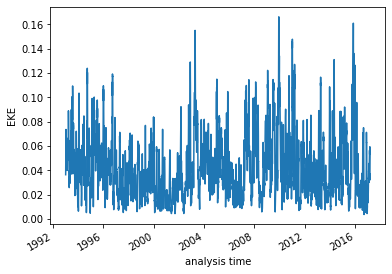

In [15]:
EKE_core.plot()